In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

df = pd.read_csv(r"C:\Users\prakh\OneDrive\Desktop\Python\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [7]:
df_DA_skills = df_DA_US_exploded.groupby(by='job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median': 'median_salary'})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [9]:
df_DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / df_DA_job_count *100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [10]:
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand


,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


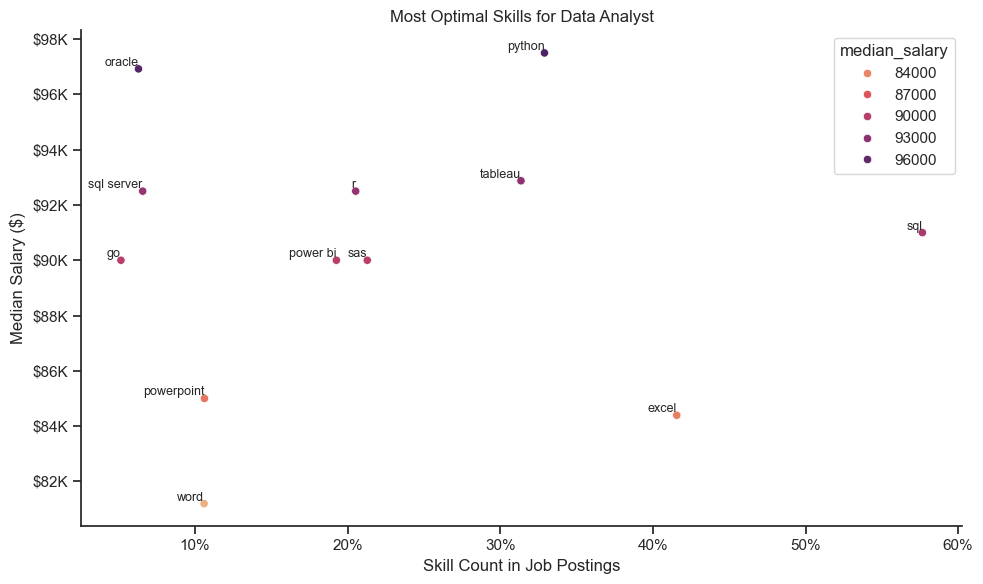

In [42]:
plt.figure(figsize=(10, 6))

sns.set_theme(style='ticks')
ax = sns.scatterplot(data=df_DA_skills_high_demand, x='skill_percent', y='median_salary', hue='median_salary', palette='flare')
sns.despine()
for i in df_DA_skills_high_demand.index:
    row = df_DA_skills_high_demand.loc[i]
    ax.text(
        row['skill_percent'],
        row['median_salary'],
        str(i),  # 'i' is the skill name from the index
        fontsize=9,
        ha='right',
        va='bottom'
    )
    
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
    
plt.title("Most Optimal Skills for Data Analyst")
plt.xlabel("Skill Count in Job Postings")
plt.ylabel("Median Salary ($)")
plt.tight_layout()
plt.show()

In [24]:
print(df_DA_skills_high_demand.columns)

Index(['skill_count', 'median_salary', 'skill_percent'], dtype='object')


In [ ]:
texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['median_salary'].iloc[i], df_DA_skills_high_demand['skill_count'].iloc[i], txt))
    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))